#**Save Model on Pickle format**
Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. **<i>By using pickle, we can save our model and load it again without re-train the model</i>**. This is one of the method to implement ML Model in application or apps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import pickle
import json

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
warnings.filterwarnings('ignore')
%matplotlib inline

# Result : https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb
# Intro to deploy : https://github.com/dphi-official/Micro-Courses/tree/master/Introduction_Model_Deployment/server

##**Load the Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##**Preprocessing**

###**Drop unnecessary features**
- Availability : it is not needed
- Society : too many categories and missing values(2689 from 1320 data)

In [5]:
df2 = df.drop(['availability','society'], axis=1)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


###**Missing value handling**

In [6]:
df2.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2.location = df2.location.fillna(df2.location.mode()[0])
df2.bath = df2.bath.fillna(df2.bath.median())
df2.balcony = df2.balcony.fillna(df2.balcony.median())

df2.isna().sum()

area_type      0
location       0
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

**Handling String Input**

In [8]:
def string_concat(x):
  token = x.split()
  token = ' '.join(token)
  return token

df2.area_type = df2.area_type.apply(string_concat)
df2.location = df2.location.apply(string_concat)

**Handling Size**

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2_tmp = df2[df2['size'].isnull()]

In [11]:
df2 = df2[df2['size'].notnull()]
df2['size'] = df2['size'].apply(lambda x : int(x.split()[0]))
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [12]:
df2_tmp['size'] = df2['size'].median()

In [13]:
df2 = pd.concat([df2, df2_tmp], ignore_index=True)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00


In [14]:
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [15]:
df2 = df2[df2['size']<21]
df2.reset_index(inplace=True)

###**Handling total_sqft**

In [16]:
#function to check all not float data
def check_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [17]:
df2[~df2['total_sqft'].apply(check_float)].head(50)
#pattern 1234, 1234 - 4567, 34.46Sq. Meter, 4125Perch, 1100Sq. Yards, 30Acres	

,index,area_type,location,size,total_sqft,bath,balcony,price
30,30,Super built-up Area,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000
56,56,Built-up Area,Devanahalli,4.0,3010 - 3410,2.0,2.0,192.000
81,81,Built-up Area,Hennur Road,4.0,2957 - 3450,2.0,2.0,224.500
122,122,Super built-up Area,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000
137,137,Super built-up Area,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005
165,165,Super built-up Area,Sarjapur,2.0,1145 - 1340,2.0,0.0,43.490
188,188,Super built-up Area,KR Puram,2.0,1015 - 1540,2.0,0.0,56.800
224,224,Super built-up Area,Devanahalli,3.0,1520 - 1740,2.0,2.0,74.820
410,410,Super built-up Area,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.500
549,549,Super built-up Area,Hennur Road,2.0,1195 - 1440,2.0,0.0,63.770


In [18]:
def area_conversion(x):
  try:
    return float(x)
  except:
    try:
      token = x.split('-')
      return (float(token[0])+float(token[1]))/2
    except:
      try:
        return float(x.split('Sq. Meter')[0])*10.7639
      except:
        try:
          return float(x.split('Perch')[0])
        except:
          return None

df2['total_sqft'] = df2['total_sqft'].apply(area_conversion)

In [19]:
df2 = df2[df2['total_sqft'].notnull()]
df2.isna().sum()

index         0
area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

##**Feature Engineering**

###**Create new feature price per ssqft**

In [20]:
df2.drop('index', axis=1, inplace= True)

In [21]:
#new feature to get the price per sqft
df3 = df2.copy()
df3['price_per_sqft'] = round(df3.price*100000/df3.total_sqft,2)
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.81
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.38
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.56
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.89
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.00


###**Handle the dimension on location**

In [22]:
#there isn't problem with this data
df3.area_type.nunique()

4

In [23]:
#to much kind of location, call dimensionality cost
print(df3.location.nunique())

#how to handle it? group the data
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

1287


location
Whitefield                            540
Sarjapur Road                         399
Electronic City                       304
Kanakpura Road                        271
Thanisandra                           237
                                     ... 
Kudlu Village,                          1
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
1 Annasandrapalya                       1
Name: location, Length: 1287, dtype: int64

In [24]:
#give the threshold, frequency less than 10 --> other
print(len(location_stats[location_stats<10]))
print("New location : ", df3.location.nunique()-len(location_stats[location_stats<10]))

1033
New location :  254


In [25]:
location_less_than_10 = location_stats[location_stats<10]

#change to other
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
print(df3.location.nunique())
df3.head()

255


,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.81
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.38
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.56
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.89
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.00


###**Outlier Handling**

bedroom (size) with total_sqft. Usually single bedroom need more than 300 sqft. So, we can remove if total_sqft / size < 300 (I will change to 290) it means outlier

In [26]:
print(df3.shape[0])
df4 = df3[~(df3['total_sqft']/df3['size']<300)]
print(df4.shape[0])

13290
12547


handle outlier in price per sqft group by location, using standard deviation

In [27]:
df4.price_per_sqft.describe()

count     12547.000000
mean       6301.351580
std        4161.388232
min         267.830000
25%        4208.335000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

to many outlier because the distence between mean and min/max is too far

In [28]:
def remove_outlier(df):
  df_out = pd.DataFrame()
  for key, sub_df in df.groupby('location'):
    mean = np.mean(sub_df.price_per_sqft)
    std = np.std(sub_df.price_per_sqft)
    reduce_df = sub_df[(sub_df.price_per_sqft>(mean-std))&(sub_df.price_per_sqft<(mean+std))]
    df_out = pd.concat([df_out, reduce_df], ignore_index=True)
  return df_out

df5 = remove_outlier(df4)
df5.shape[0]

10295

Visualize data where the price for 3bedroom < 2bedroom in the same location

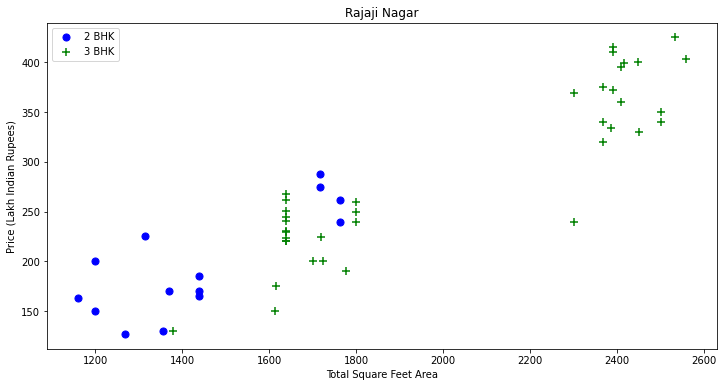

In [29]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df['size']==2)]
    bhk3 = df[(df.location==location) & (df['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (12,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

See the visualization, there are some 2BHK that price more then 3BHK with the same location. So we need to delete it.

In [30]:
"""
group by location
for every location, we will group the data by the bedroom
for example
In city A
'1':{
  mean : 20,
  count : 10
}
'2':{
  mean : 40,
  count : 10
}

in data with bedroom 2, if the data price < mean value of data with bedroo 1, we will drop it
"""
def remove_bhk_outlier(df):
  exclude_indices = np.array([])
  for _,location_df in df.groupby('location'):
    bhk_status = {}
    for idx, bhk_df in location_df.groupby('size'):
      bhk_status[idx] = {
          'mean' : np.mean(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for idx, bhk_df in location_df.groupby('size'):
      stats = bhk_status.get(idx-1)
      if stats and stats['count']>5: #just handle if the data per location per bedroom more then 5 data
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outlier(df5)
df6.shape[0]

7406

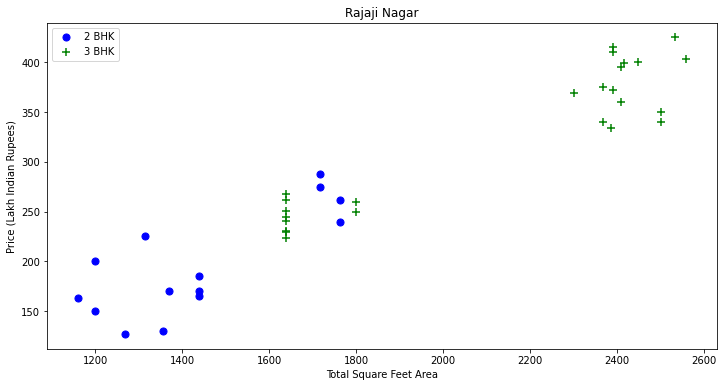

In [31]:
#see the differrent from the previous plot
plot_scatter_chart(df6,"Rajaji Nagar")

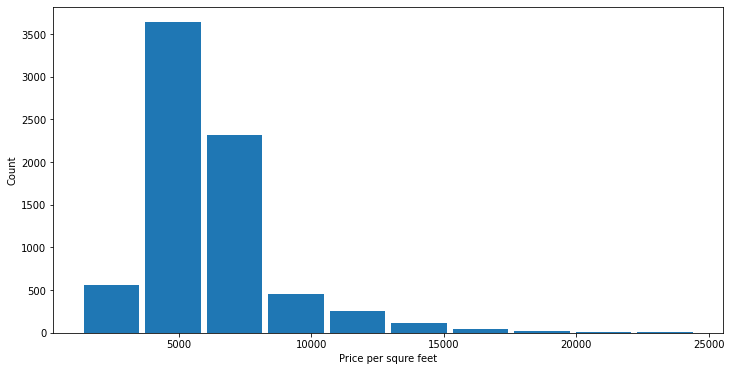

In [32]:
plt.figure(figsize=(12,6))
plt.hist(df6.price_per_sqft, rwidth=0.9)
plt.xlabel("Price per squre feet")
plt.ylabel("Count")
plt.show()

bathroom outlier, the number of bathroom usually <= bedroom + 2 (max). If more then it, it unusual

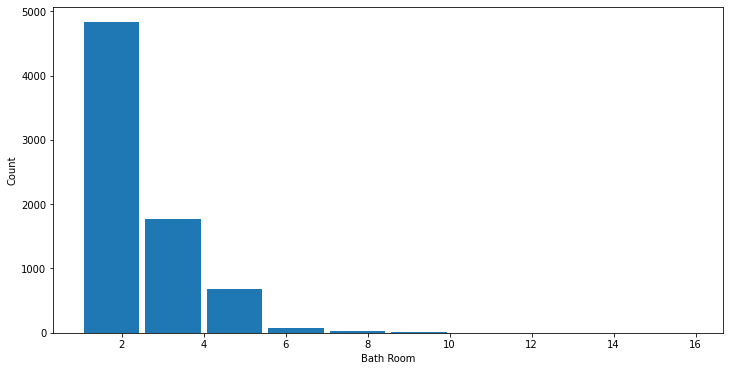

In [33]:
plt.figure(figsize=(12,6))
plt.hist(df6.bath, rwidth=0.9)
plt.xlabel("Bath Room")
plt.ylabel("Count")
plt.show()

In [34]:
df6[df6.bath>df6['size']+2]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
586,Plot Area,BTM 1st Stage,9.0,3300.0,14.0,2.0,500.0,15151.52
1654,Built-up Area,Chikkabanavar,4.0,2460.0,7.0,2.0,80.0,3252.03
5350,Built-up Area,Nagasandra,4.0,7000.0,8.0,2.0,450.0,6428.57
6851,Super built-up Area,Thanisandra,3.0,1806.0,6.0,2.0,116.0,6423.03
8544,Super built-up Area,other,6.0,11338.0,9.0,1.0,1000.0,8819.90


In [35]:
df7 = df6[df6.bath<df6['size']+2]
df7.reset_index(inplace=True)

###**Encoding**

In [36]:
ohe = OneHotEncoder(sparse=False)
df_encode = pd.DataFrame(ohe.fit_transform(df7[['area_type','location']]))
df_encode.columns = ohe.get_feature_names(['area_type','location'])
df7.drop(['area_type','location','price_per_sqft'] ,axis=1, inplace=True)
df7= pd.concat([df7, df_encode], axis=1)
df7.drop('index', axis=1, inplace= True)
df7.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_AECS Layout,location_Abbigere,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Amruthahalli,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ardendale,location_Arekere,location_Attibele,location_BEML Layout,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Balagere,...,location_Sarjapur,location_Sarjapur Road,location_Sarjapura - Attibele Road,location_Sector 1 HSR Layout,location_Sector 2 HSR Layout,location_Sector 7 HSR Layout,location_Seegehalli,location_Shampura,location_Shivaji Nagar,location_Singasandra,location_Somasundara Palya,location_Sompura,location_Sonnenahalli,location_Subramanyapura,location_Sultan Palaya,location_TC Palaya,location_Talaghattapura,location_Thanisandra,location_Thigalarapalya,location_Thubarahalli,location_Thyagaraja Nagar,location_Tindlu,location_Tumkur Road,location_Ulsoor,location_Uttarahalli,location_Varthur,location_Varthur Road,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,2850.0,4.0,1.0,428.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1630.0,3.0,2.0,194.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1875.0,2.0,3.0,235.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1200.0,2.0,0.0,130.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1235.0,2.0,2.0,148.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Split feature and target**

In [37]:
inputs = df7.drop('price', axis=1)
target = df7.price

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

#**Build Machine Learning Model**
This problem is about the prediction of a house price, so it is a case of regression. We have to solve the problem using regression algorithm.

##**Linear Regression**

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print("Accuracy score\t: ", lr.score(x_test, y_test))
print("MSE score\t: ", mean_squared_error(lr.predict(x_test),y_test))

Accuracy score	:  0.7883748859835056
MSE score	:  1904.6269355460922


**Cross Validation**

In [40]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), inputs, target, cv=cv)

array([0.84785029, 0.83489269, 0.72828605, 0.87685817, 0.7434672 ])

**GridSearchCV function**

In [41]:
#find the best model using gridsearchcv
def find_best_model(inputs, target):
  algos = {
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
              'normalize':[True, False]
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2,3],
              'selection':['random','cyclic']
          }
      },
      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']
          }
      },
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(inputs, target)
    scores.append({
        'model' : algo_name,
        'best_score' :round(float(gs.best_score_),2),
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(inputs, target)

,model,best_score,best_params
0,linear_regression,0.83,{'normalize': True}
1,lasso,0.67,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.74,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [42]:
clf_model = LinearRegression(normalize=True)
clf_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

##**Predict New Data**

In [43]:
#test get column index
def get_col (area_type):
  area_index = np.where(inputs.columns==('area_type_'+area_type))
  print(area_index)

get_col('Carpet Area')

(array([5]),)


In [44]:
def predict_price(area_type, location, bedroom, bathroom, sqft, balcony):
  area_index = np.where(inputs.columns==('area_type_'+area_type))
  location_index = np.where(inputs.columns==('location_'+location))

  data = np.zeros(len(inputs.columns))
  data[0] = bedroom
  data[1] = sqft
  data[2] = bathroom
  data[3] = balcony
  data[area_index] = 1
  data[location_index] = 1

  return clf_model.predict([data])[0]

In [45]:
# area_type ['Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area']
# location example ['1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar', '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi']
print("Estimate Price: ",predict_price('Plot Area', '1st Block Jayanagar',3,2,1200,2))

Estimate Price:  229.65625


##**Save the Model in pickle format**

In [46]:
#pickle model
with open('bengalor_model.pickle','wb') as f:
  pickle.dump(clf_model,f)

In [47]:
#save the columns name in json format
columns = {
    'data_columns' : [col.lower() for col in inputs.columns]
}

with open('columns.json','w') as f:
  f.write(json.dumps(columns))